### **Notebook to compare transcript measurements with 13C flux measurements** 

##### **Import python packages**

In [1]:
import pandas as pd
import numpy as np
import cobra
from matplotlib import pyplot as plt

from edd_utils import login, export_study, export_metadata

##### **Load Yondeda 2016 data**

In [2]:
# Study to Download
study_slug = 'biodesign_yoneda_set3_reprocessed'
# EDD server
edd_server = 'public-edd.jbei.org'
user       = 'garrettroell'

In [3]:
session = login(edd_server=edd_server, user=user)

df = export_study(session, study_slug, edd_server=edd_server)

Password for garrettroell:  ················


##### **Filter transcriptomics data from all EDD data into different dataframes**

In [4]:
trans_df = df[df['Protocol'].str.contains('Transcriptomics')]
trans_df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,14400,Biodesign_Yoneda_set3_reprocessed,15006,EVOL33-LN-G-R1,R. Opacus adaptively evolved strain1 with 1.0 ...,Transcriptomics,15030,EVOL33-LN-G-R1,NaN,WP_000104864_1,0,FPKM,0.0,14.0
1,14400,Biodesign_Yoneda_set3_reprocessed,15007,EVOL33-LN-G-R2,R. Opacus adaptively evolved strain1 with 1.0 ...,Transcriptomics,15031,EVOL33-LN-G-R2,NaN,WP_000104864_1,0,FPKM,0.0,14.0
2,14400,Biodesign_Yoneda_set3_reprocessed,15008,EVOL33-LN-G-R3,R. Opacus adaptively evolved strain1 with 1.0 ...,Transcriptomics,15032,EVOL33-LN-G-R3,NaN,WP_000104864_1,0,FPKM,0.0,14.0
3,14400,Biodesign_Yoneda_set3_reprocessed,14991,EVOL33-LN-LP-R1,R. Opacus adaptively evolved strain1 with 0.75...,Transcriptomics,15015,EVOL33-LN-LP-R1,NaN,WP_000104864_1,0,FPKM,0.0,24.0
4,14400,Biodesign_Yoneda_set3_reprocessed,14992,EVOL33-LN-LP-R2,R. Opacus adaptively evolved strain1 with 0.75...,Transcriptomics,15016,EVOL33-LN-LP-R2,NaN,WP_000104864_1,0,FPKM,0.0,24.0


#####  **Get glucose 13C MFA measured fluxes**

In [5]:
glucose_fluxes = pd.read_csv('../13C_flux_data/13C_glucose_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
glucose_fluxes.dropna(inplace=True)
print(f'There are {len(glucose_fluxes)} fluxes that can be compared between the MFA and FBA')
glucose_fluxes

There are 31 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Glucose Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91
5,EMP Pathway,GAPD,"GAP <-> G1,3P","(-220, 30)",86.56,82.61,88.84
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",86.56,82.61,88.84
7,EMP Pathway,PGM_1 or reverse_PGM,3PG <-> 2PG,"(-220, -135)",78.52,71.65,81.26
8,EMP Pathway,reverse_PPS or FRUpts2pp or SBTpts or MNLpts o...,2PG <-> PEP,"(-220, -215)",78.52,71.65,81.26
10,Pentose Phosphate Pathway,G6PDH2r and PGL,G6P <-> 6PG + NADPH,"(50, 380)",100.00,96.96,100.00


##### **Load Genome Scale Model**

In [6]:
file_name =  '../GSMs/Ropacus_annotated_curated_with_phenol_custom_biomass.xml'
model = cobra.io.read_sbml_model(file_name)

#### Define functions to find transcript levels for a reaction given a transcriptomic dataframe ####

In [7]:
def create_gprdict(model):   
    gpr_dict = dict()
    for rxn in model.reactions:
        if rxn.gene_reaction_rule:
            temp = set()
            for x in [x.strip('() ') for x in rxn.gene_reaction_rule.split(' or ')]:
                temp.add(frozenset(y.strip('() ') for y in x.split(' and ')))
            gpr_dict[rxn.id] = temp
    return gpr_dict

"""
    Calculates bound value based on transcriptomics data for reactions in gene reaction rule
    
    NOTE: 
    If a reaction R1 has the GPR of 'A and B', it would be parsed to { {A, B} } in gpr_dict['R1']. Then t for R1 would be sum( [ min(A, B) ] ) = min(A, B).
    If a reaction R1 has the GPR of 'A or B', it would be parsed to { {A}, {B} } in gpr_dict['R1']. Then t for R1 would be sum( [ min(A), min(B) ] ) = sum( [A, B] ).
    If a reaction R1 has the GPR of '(A and B) or (C and D)', it would be parsed to { {A, B}, {C, D} } in gpr_dict['R1']. Then t for R1 would be sum( [ min(A, B), min(C, D) ] ).
    
        Parameters
        ----------
        model : cobrapy model.
        Transcriptomics : pandas dataframe with transcriptomics data.Data frame has gene identifiers as index and just one column with transcript values.  
        rxn : cobrapy model reaction
        
        
        Returns
        -------
        transscript bound value: float.
"""

def findtransboundval_forgprrxns(model, Transcriptomics,rxn, newinf=np.inf):
    finaltransval = 0
    listids = []
    for parallel_gene in create_gprdict(model)[rxn.id]:
        transvals = []
        for gene in parallel_gene:
            if gene in Transcriptomics.index:
                transvals.append(Transcriptomics.loc[gene].values)
            else:
                transvals.append(np.inf)
            mintransval=np.min(transvals)
            if mintransval == np.inf:
                mintransval= newinf
        finaltransval = finaltransval + mintransval
#         if finaltransval==newinfbound:
#             display(rxn.id)
#             listids.append(rxn.id)
    return finaltransval


#### Define a function to get the input transcriptomic dataframe for findtransboundval_forgprrxns ####

In [8]:
def constructTransdffrompred(transdata, linename):
    transdataWTPR1 = transdata[transdata['Line Name']==linename]
    transdataWTPR1new = transdataWTPR1.filter(['Value', 'Measurement Type'])
    transdataWTPR1new2 = transdataWTPR1new.set_index('Measurement Type')
    return transdataWTPR1new2

#### Loop over conditions and rows to add transcriptomic values to the dataframe

In [9]:
glucose_conditions = [
    'EVOL33-LN-G-R1',
    'EVOL33-LN-G-R2',
    'EVOL33-LN-G-R3',
    'EVOL40-LN-G-R1',
    'EVOL40-LN-G-R2',
    'EVOL40-LN-G-R3',
    'WT-LN-G-R1',
    'WT-LN-G-R2',
    'WT-LN-G-R3'
]

for condition in glucose_conditions:

    # get the transcriptomic df for the condition
    transcriptomics_df = constructTransdffrompred(trans_df, condition)

    # define a list to hold all transcript measurements for a condtion
    transcript_measurements = [] 

    # loop over the 13C MFA reactions
    for _, row in glucose_fluxes.iterrows():

        # get the reaction ids associated with the flux for that row
        reaction_id_string = row['Forward Reactions']
        mfa_reaction = row['Reaction']

        # remove directionality
        reaction_id_string = reaction_id_string.replace('reverse_', '')

        # convert to an array of parallel sets of reactions
        reaction_ids = reaction_id_string.split(' or ')

        # define a value to act as a counter
        transcript_level = 0

        for reaction_id in reaction_ids:
            # remove spaces and parentheses
            reaction_id = reaction_id.strip('() ')

            if ' and ' in reaction_id:
                series_reactions = reaction_id.split(' and ')
                # loop over reactions that have and relationships and add min value to the transcript total
                series_transcripts = []
                for series_reaction in series_reactions:
                    # get transcript level for a given reaction in the genome scale model
                    rxn = model.reactions.get_by_id(series_reaction)
                    transcript_level = findtransboundval_forgprrxns(model, transcriptomics_df, rxn, newinf=np.inf)
                    series_transcripts.append(transcript_level)
                # only add the minimum transcript level of reactions connected by 'and' relations
                transcript_level += min(series_transcripts)
            else:
                rxn = model.reactions.get_by_id(reaction_id)
                if rxn.id in create_gprdict(model).keys():
                    reaction_transcripts =  findtransboundval_forgprrxns(model, transcriptomics_df, rxn)
                    transcript_level += reaction_transcripts
                else:
                    pass

        transcript_measurements.append(transcript_level)

    glucose_fluxes[condition + ' transcripts'] = transcript_measurements

glucose_fluxes.head()

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,EVOL33-LN-G-R1 transcripts,EVOL33-LN-G-R2 transcripts,EVOL33-LN-G-R3 transcripts,EVOL40-LN-G-R1 transcripts,EVOL40-LN-G-R2 transcripts,EVOL40-LN-G-R3 transcripts,WT-LN-G-R1 transcripts,WT-LN-G-R2 transcripts,WT-LN-G-R3 transcripts
0,Glucose Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42,339.77434,333.37109,325.13618,282.25838,282.34734,271.35304,270.55161,242.91212,285.06464
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91,642.00867,599.81818,617.06697,667.32051,648.11338,625.11398,704.42129,648.56446,741.30736
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91,113.47081,103.43466,116.04595,88.28107,102.10006,85.06621,100.31113,98.25414,109.88136
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91,100.92202,101.01041,118.81306,79.72413,76.11263,86.29313,79.60794,63.17894,72.44159


#### Convert transcipts to average and standard deviation for each strain

In [10]:
strains = ['WT', 'EVOL33', 'EVOL40']

for strain in strains:
    # isolate the trials for a single strain
    strain_cols = [col for col in glucose_fluxes.columns if strain in col]
    strain_df = glucose_fluxes[strain_cols]
    
    # calculate the average and standard deviation for each row
    avg_col = strain_df.mean(axis=1)
    std_col = strain_df.std(axis=1)
    
    # drop the single trial values
    glucose_fluxes.drop(strain_cols, axis=1, inplace=True)
    
    # add the average and standard deviation columns
    glucose_fluxes[f'{strain} trans avg'] = avg_col
    glucose_fluxes[f'{strain} trans std'] = std_col
    
glucose_fluxes

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,WT trans avg,WT trans std,EVOL33 trans avg,EVOL33 trans std,EVOL40 trans avg,EVOL40 trans std
0,Glucose Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42,266.176123,21.414187,332.760537,7.338155,278.652920,6.322038
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91,698.097703,46.693706,619.631273,21.211815,646.849290,21.131641
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91,102.815543,6.205008,110.983807,6.663336,91.815780,9.050339
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91,71.742823,8.236760,106.915163,10.303976,80.709963,5.161351
5,EMP Pathway,GAPD,"GAP <-> G1,3P","(-220, 30)",86.56,82.61,88.84,284.768950,8.442706,335.548963,24.206507,255.928620,38.898973
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",86.56,82.61,88.84,145.175877,16.847036,211.693833,18.395998,158.604067,4.766068
7,EMP Pathway,PGM_1 or reverse_PGM,3PG <-> 2PG,"(-220, -135)",78.52,71.65,81.26,287.466580,11.728371,304.978637,12.899062,306.866667,14.052888
8,EMP Pathway,reverse_PPS or FRUpts2pp or SBTpts or MNLpts o...,2PG <-> PEP,"(-220, -215)",78.52,71.65,81.26,1163.355667,64.796167,1372.141210,129.057724,1210.067060,63.525768
10,Pentose Phosphate Pathway,G6PDH2r and PGL,G6P <-> 6PG + NADPH,"(50, 380)",100.00,96.96,100.00,110.676987,10.192412,152.246413,2.015697,152.830153,14.788734


In [11]:
# save data to csv
glucose_fluxes.to_csv('../transcript_vs_flux_data/glucose.csv')

#### Could normalize fluxes here

#### Define plotting function

In [12]:
def plot_transcripts_vs_fluxes(flux_trans_df, substrate, strain):
    fig, ax = plt.subplots(figsize=(8, 8))

    for pathway in list(set(flux_trans_df['Pathway'])):
        pathway_df = flux_trans_df[flux_trans_df['Pathway'] == pathway]

        transcript_list = list(pathway_df[f'{strain} trans avg'])
        flux_list = list(pathway_df['Flux'])
        
        transcript_std_list = list(pathway_df[f'{strain} trans std'])
        flux_lower_std_list = list(pathway_df['Flux'] - pathway_df['90% Confidence Lower Bound'])
        flux_upper_std_list = list(pathway_df['90% Confidence Upper Bound'] - pathway_df['Flux'])

        ax.scatter(transcript_list, flux_list, label=pathway)
        
        ax.errorbar(
            transcript_list,
            flux_list, 
            xerr=[std1 for std1 in transcript_std_list], 
            yerr = [
                flux_lower_std_list,
                flux_upper_std_list
            ],
            ecolor="gray", 
            ls='none',
            alpha=0.3
        )        
    # Dashed line
    # x = np.linspace(*ax.get_xlim())
    # ax.plot(x, x, ls="--", c=".3")
    plt.title(f'{strain} {substrate.capitalize()} Transcripts vs. Fluxes', fontSize=20)
    plt.xlabel('Transcript Level (Fragments Per Kilobase Million)')
    plt.ylabel('Flux (mmol reaction per 100 mmol of '+str(substrate)+  ' uptake)')
    plt.legend()
    plt.show()

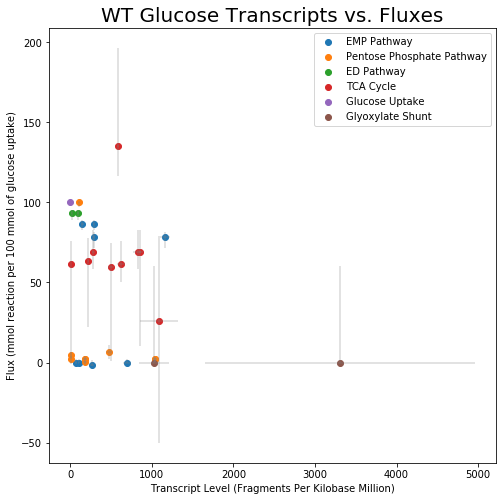

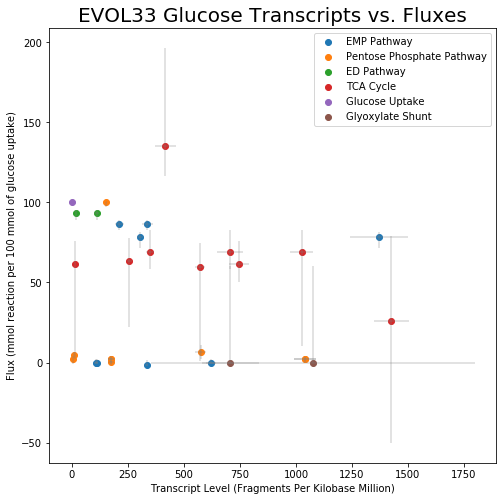

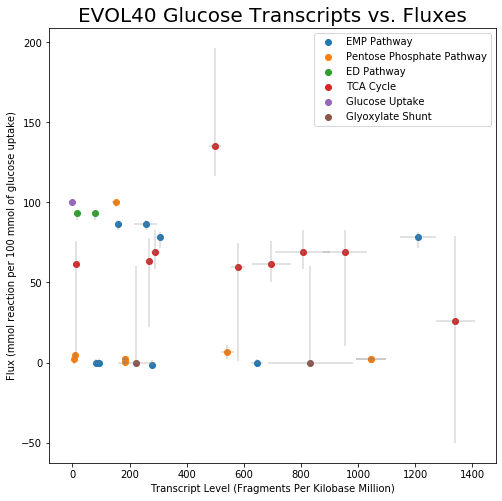

In [13]:
plot_transcripts_vs_fluxes(glucose_fluxes, 'glucose', 'WT')
plot_transcripts_vs_fluxes(glucose_fluxes, 'glucose', 'EVOL33')
plot_transcripts_vs_fluxes(glucose_fluxes, 'glucose', 'EVOL40')

---
## Compare phenol transcripts and fluxes

#### **Load Henson 2018 data**

In [14]:
# Study to Download
study_slug = 'biodesign_henson2018_reprocessed'
# EDD server
edd_server = 'public-edd.jbei.org'
user       = 'garrettroell'

In [15]:
session = login(edd_server=edd_server, user=user)

df = export_study(session, study_slug, edd_server=edd_server)

Password for garrettroell:  ················


##### **Filter transcriptomics data from all EDD data into different dataframes**

In [16]:
trans_df = df[df['Protocol'].str.contains('Transcriptomics')]
trans_df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,14409,Biodesign_Henson2018_reprocessed,14905,WT-M-R1,R. Opacus wild type strain with Mixture of all...,Transcriptomics,14948,WT-M-R1,NaN,WP_000104864_1,0,FPKM,0.0,20.0
1,14409,Biodesign_Henson2018_reprocessed,14905,WT-M-R1,R. Opacus wild type strain with Mixture of all...,Transcriptomics,14948,WT-M-R1,NaN,WP_000104864_1,0,FPKM,0.0,32.0
2,14409,Biodesign_Henson2018_reprocessed,14906,WT-M-R2,R. Opacus wild type strain with Mixture of all...,Transcriptomics,14949,WT-M-R2,NaN,WP_000104864_1,0,FPKM,0.0,20.0
3,14409,Biodesign_Henson2018_reprocessed,14906,WT-M-R2,R. Opacus wild type strain with Mixture of all...,Transcriptomics,14949,WT-M-R2,NaN,WP_000104864_1,0,FPKM,0.0,32.0
4,14409,Biodesign_Henson2018_reprocessed,14907,WT-M-R3,R. Opacus wild type strain with Mixture of all...,Transcriptomics,14950,WT-M-R3,NaN,WP_000104864_1,0,FPKM,0.0,20.0


#####  **Get phenol 13C MFA measured fluxes**

In [17]:
phenol_fluxes = pd.read_csv('../13C_flux_data/13C_phenol_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
phenol_fluxes.dropna(inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')
phenol_fluxes

There are 32 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Phenol Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",1.000000e+02,1.000000e+02,100.0000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-4.793000e-01,-1.421900e+00,0.9306
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.000000e+00,-2.000000e+00,-0.7683
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.000000e+00,-2.000000e+00,-0.7683
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.000000e+00,-2.000000e+00,-0.7683
5,EMP Pathway,GAPD,"GAP <-> G1,3P","(-220, 30)",-1.079070e+01,-1.122350e+01,-9.1040
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",-1.079070e+01,-1.122350e+01,-9.1040
7,EMP Pathway,PGM_1 or reverse_PGM,3PG <-> 2PG,"(-220, -135)",-1.625380e+01,-1.695560e+01,-13.6034
8,EMP Pathway,ENO,2PG <-> PEP,"(-220, -215)",-1.625380e+01,-1.695560e+01,-13.6034
9,EMP Pathway,PPS or reverse_FRUpts2pp or reverse_SBTpts or ...,PEP <-> Pyr + ATP,"(-220, -295)",2.999990e+01,0.000000e+00,30.0000


In [18]:
[line for line in set(list(trans_df['Line Name'])) if '-P-' in line]

['PVHG-P-R3', 'PVHG-P-R2', 'WT-P-R1', 'WT-P-R3', 'PVHG-P-R1', 'WT-P-R2']

In [19]:
phenol_conditions = [
    'WT-P-R1',
    'WT-P-R2',
    'WT-P-R3',
    'PVHG-P-R1',
    'PVHG-P-R2',
    'PVHG-P-R3',
]

for condition in phenol_conditions:

    # get the transcriptomic df for the condition
    transcriptomics_df = constructTransdffrompred(trans_df, condition)

    # define a list to hold all transcript measurements for a condtion
    transcript_measurements = [] 

    # loop over the 13C MFA reactions
    for _, row in phenol_fluxes.iterrows():

        # get the reaction ids associated with the flux for that row
        reaction_id_string = row['Forward Reactions']
        mfa_reaction = row['Reaction']

        # remove directionality
        reaction_id_string = reaction_id_string.replace('reverse_', '')

        # convert to an array of parallel sets of reactions
        reaction_ids = reaction_id_string.split(' or ')

        # define a value to act as a counter
        transcript_level = 0

        for reaction_id in reaction_ids:
            # remove spaces and parentheses
            reaction_id = reaction_id.strip('() ')

            if ' and ' in reaction_id:
                series_reactions = reaction_id.split(' and ')
                # loop over reactions that have and relationships and add min value to the transcript total
                series_transcripts = []
                for series_reaction in series_reactions:
                    # get transcript level for a given reaction in the genome scale model
                    rxn = model.reactions.get_by_id(series_reaction)
                    transcript_level = findtransboundval_forgprrxns(model, transcriptomics_df, rxn, newinf=np.inf)
                    series_transcripts.append(transcript_level)
                # only add the minimum transcript level of reactions connected by 'and' relations
                transcript_level += min(series_transcripts)
            else:
                rxn = model.reactions.get_by_id(reaction_id)
                if rxn.id in create_gprdict(model).keys():
                    reaction_transcripts =  findtransboundval_forgprrxns(model, transcriptomics_df, rxn)
                    transcript_level += reaction_transcripts
                else:
                    pass

        transcript_measurements.append(transcript_level)

    phenol_fluxes[condition + ' transcripts'] = transcript_measurements

phenol_fluxes.head()

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,WT-P-R1 transcripts,WT-P-R2 transcripts,WT-P-R3 transcripts,PVHG-P-R1 transcripts,PVHG-P-R2 transcripts,PVHG-P-R3 transcripts
0,Phenol Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306,617.74220,701.54889,769.60990,2140.20677,1674.03135,1737.58061
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683,1033.37976,960.04318,822.33970,1542.33060,1425.57987,1309.80100
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683,283.42121,276.29118,276.27965,124.91224,136.59720,146.31124
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683,137.66675,124.24864,103.12969,799.56933,516.73819,390.85564


#### Convert transcipts to average and standard deviation for each strain

In [20]:
strains = ['WT', 'PVHG']

for strain in strains:
    # isolate the trials for a single strain
    strain_cols = [col for col in phenol_fluxes.columns if strain in col]
    strain_df = phenol_fluxes[strain_cols]
    
    # calculate the average and standard deviation for each row
    avg_col = strain_df.mean(axis=1)
    std_col = strain_df.std(axis=1)
    
    # drop the single trial values
    phenol_fluxes.drop(strain_cols, axis=1, inplace=True)
    
    # add the average and standard deviation columns
    phenol_fluxes[f'{strain} trans avg'] = avg_col
    phenol_fluxes[f'{strain} trans std'] = std_col
    
phenol_fluxes

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,WT trans avg,WT trans std,PVHG trans avg,PVHG trans std
0,Phenol Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",1.000000e+02,1.000000e+02,100.0000,0.000000,0.000000,0.000000,0.000000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-4.793000e-01,-1.421900e+00,0.9306,696.300330,76.069771,1850.606243,252.806202
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.000000e+00,-2.000000e+00,-0.7683,938.587547,107.143525,1425.903823,116.265138
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.000000e+00,-2.000000e+00,-0.7683,278.664013,4.119857,135.940227,10.714617
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.000000e+00,-2.000000e+00,-0.7683,121.681693,17.411032,569.054387,209.319035
5,EMP Pathway,GAPD,"GAP <-> G1,3P","(-220, 30)",-1.079070e+01,-1.122350e+01,-9.1040,643.131200,304.813089,2840.484830,1720.028077
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",-1.079070e+01,-1.122350e+01,-9.1040,248.181850,33.099830,1464.069057,795.337400
7,EMP Pathway,PGM_1 or reverse_PGM,3PG <-> 2PG,"(-220, -135)",-1.625380e+01,-1.695560e+01,-13.6034,1127.095023,81.094821,1401.809063,347.580784
8,EMP Pathway,ENO,2PG <-> PEP,"(-220, -215)",-1.625380e+01,-1.695560e+01,-13.6034,723.037943,134.930480,1996.697800,99.280352
9,EMP Pathway,PPS or reverse_FRUpts2pp or reverse_SBTpts or ...,PEP <-> Pyr + ATP,"(-220, -295)",2.999990e+01,0.000000e+00,30.0000,11117.591307,1264.572977,4677.789707,429.433164


In [21]:
# save data to csv
phenol_fluxes.to_csv('../transcript_vs_flux_data/phenol.csv')

#### Plot phenol transcripts vs fluxes

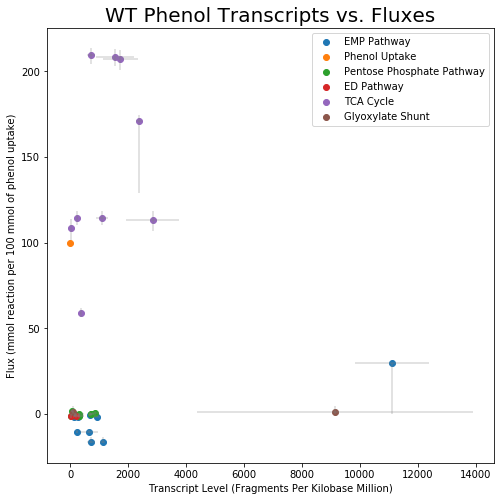

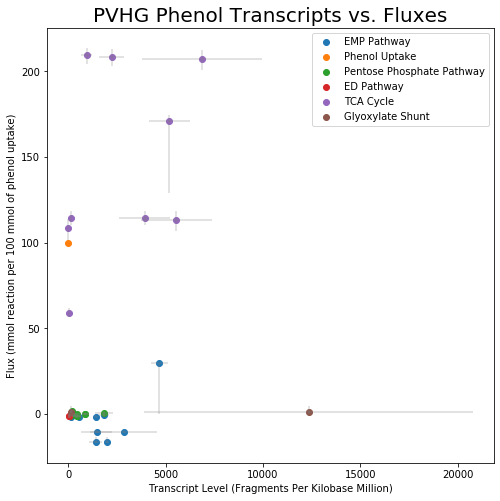

In [22]:
plot_transcripts_vs_fluxes(phenol_fluxes, 'phenol', 'WT')
plot_transcripts_vs_fluxes(phenol_fluxes, 'phenol', 'PVHG')